In [1]:
from evaluate_sdfdqn import *

/home/dof6/anaconda3/envs/grasp36/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
convex_hull = False
depth = False
resize = False

realsense = RealSenseSensor("141322252613")

# SDF module & Environment #
sdf_module = SDFModule(rgb_feature=True, resnet_feature=True, convex_hull=convex_hull, 
            binary_hole=True, using_depth=depth, tracker=False, resize=resize)
#ur5robot = UR5Robot()
#env = RealSDFEnv(ur5robot, sdf_module, num_blocks=num_blocks)

/home/dof6/Desktop/hogun_ur5/realrobot/../UnseenObjectClustering/fcn/config.py:439: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))


In [3]:
def get_view(show_img=True):
    color, depth = realsense.frames(spatial=True, hole_filling=True, temporal=True)
    if show_img:
        plt.imshow(color)
        plt.show()
    return color, depth

def crop(image, cs=480, midx = 424, midy = 240):
    return image[int(np.round(midy-cs/2)):int(np.round(midy+cs/2)), int(np.round(midx-cs/2)):int(np.round(midx+cs/2))]

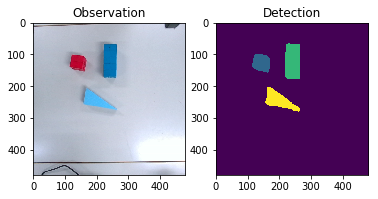

In [9]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
plt.subplot(1, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))

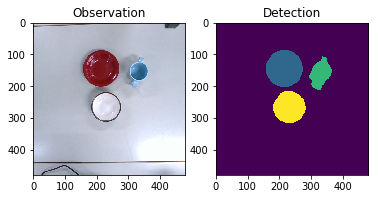

In [10]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
plt.subplot(1, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))

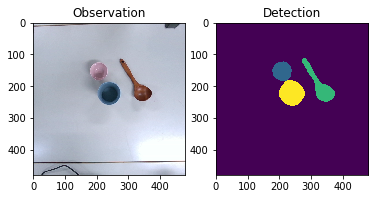

In [11]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
plt.subplot(1, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))

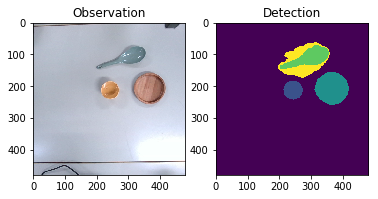

In [12]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
plt.subplot(1, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))

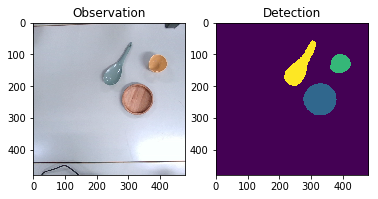

In [13]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
plt.subplot(1, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))

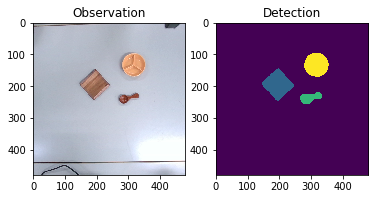

In [14]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
plt.subplot(1, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))

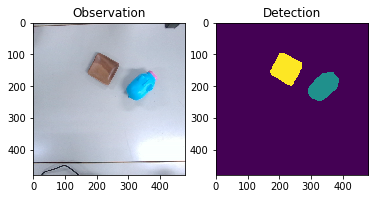

In [15]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
plt.subplot(1, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(1, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))

In [ ]:
sdf_module.get_sdf_features_with_ucn()

In [1]:
from evaluate_sdfdqn import *

/home/dof6/anaconda3/envs/grasp36/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
convex_hull = False
depth = False
resize = False

realsense = RealSenseSensor("141322252613")

# SDF module & Environment #
sdf_module = SDFModule(rgb_feature=True, resnet_feature=True, convex_hull=convex_hull, 
            binary_hole=True, using_depth=depth, tracker=False, resize=resize)
#ur5robot = UR5Robot()
#env = RealSDFEnv(ur5robot, sdf_module, num_blocks=num_blocks)

/home/dof6/Desktop/hogun_ur5/realrobot/../UnseenObjectClustering/fcn/config.py:439: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))


In [3]:
def get_view(show_img=True):
    color, depth = realsense.frames(spatial=True, hole_filling=True, temporal=True)
    if show_img:
        plt.imshow(color)
        plt.show()
    return color, depth

def crop(image, cs=480, midx = 424, midy = 240):
    return image[int(np.round(midy-cs/2)):int(np.round(midy+cs/2)), int(np.round(midx-cs/2)):int(np.round(midx+cs/2))]

In [4]:
cm = pylab.get_cmap('gist_rainbow')

def color_mask(masks):
    cmask = np.zeros([480, 480, 3])
    for m in range(len(masks)):
        cmask += np.expand_dims(masks[m], 2) * np.array(cm(m/5)[:3])
    return cmask

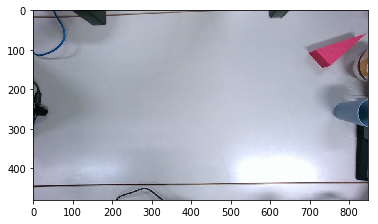

In [5]:
rgb, depth = get_view()
sdf_module.set_background(crop(depth))

In [10]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
rgb = sdf_module.remove_background(rgb)

ucn_masks, latents = sdf_module.get_ucn_masks(rgb, depth, 3)
mix_masks, latents = sdf_module.get_mix_masks(rgb, depth, 3)

plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(2, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))
plt.subplot(2, 2, 3)
plt.title('UCN')
plt.imshow(color_mask(ucn_masks))
plt.subplot(2, 2, 4)
plt.title('Mix')
plt.imshow(color_mask(mix_masks))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 3 dimension(s)

In [11]:
depth_mask = ((sdf_module.depth_bg - depth)>0.001).astype(float)
masks, latents = sdf_module.eval_ucn(rgb, depth, data_format='HWC', rotate=False)

In [12]:
ucn_masks = np.sum(masks, 0).astype(bool).astype(float)
kernel = np.ones((5, 5), np.uint8)
dilated_mask = cv2.dilate(np.expand_dims(ucn_masks, 0), kernel)



In [13]:
depth_mask.shape

(480, 480)

In [14]:
dilated_mask.shape

(1, 1)

In [ ]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
rgb = sdf_module.remove_background(rgb)

ucn_masks, latents = sdf_module.get_ucn_masks(rgb, depth, 4)
mix_masks, latents = sdf_module.get_mix_masks(rgb, depth, 4)

plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(2, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))
plt.subplot(2, 2, 3)
plt.title('UCN')
plt.imshow(color_mask(ucn_masks))
plt.subplot(2, 2, 4)
plt.title('Mix')
plt.imshow(color_mask(mix_masks))

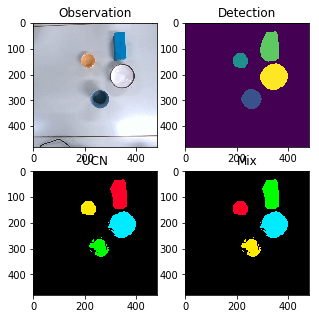

In [76]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
rgb = sdf_module.remove_background(rgb)

ucn_masks, latents = sdf_module.get_ucn_masks(rgb, depth, 4)
mix_masks, latents = sdf_module.get_mix_masks(rgb, depth, 4)

plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(2, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))
plt.subplot(2, 2, 3)
plt.title('UCN')
plt.imshow(color_mask(ucn_masks))
plt.subplot(2, 2, 4)
plt.title('Mix')
plt.imshow(color_mask(mix_masks))

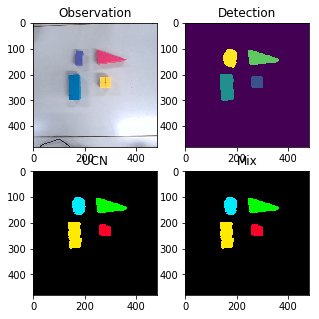

In [79]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
rgb = sdf_module.remove_background(rgb)

ucn_masks, latents = sdf_module.get_ucn_masks(rgb, depth, 4)
mix_masks, latents = sdf_module.get_mix_masks(rgb, depth, 4)

plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(2, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))
plt.subplot(2, 2, 3)
plt.title('UCN')
plt.imshow(color_mask(ucn_masks))
plt.subplot(2, 2, 4)
plt.title('Mix')
plt.imshow(color_mask(mix_masks))

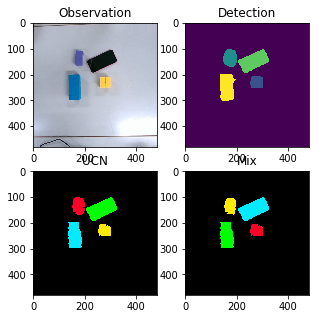

In [81]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
rgb = sdf_module.remove_background(rgb)

ucn_masks, latents = sdf_module.get_ucn_masks(rgb, depth, 4)
mix_masks, latents = sdf_module.get_mix_masks(rgb, depth, 4)

plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(2, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))
plt.subplot(2, 2, 3)
plt.title('UCN')
plt.imshow(color_mask(ucn_masks))
plt.subplot(2, 2, 4)
plt.title('Mix')
plt.imshow(color_mask(mix_masks))

In [6]:
rgb, depth = get_view(False)
rgb, depth = crop(rgb)/255., crop(depth)
rgb = sdf_module.remove_background(rgb)

ucn_masks, latents = sdf_module.get_ucn_masks(rgb, depth, 3)
mix_masks, latents = sdf_module.get_mix_masks(rgb, depth, 3)

plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.title('Observation')
plt.imshow(rgb)
plt.subplot(2, 2, 2)
plt.title('Detection')
plt.imshow(sdf_module.detect_objects(rgb, depth, 'HWC'))
plt.subplot(2, 2, 3)
plt.title('UCN')
plt.imshow(color_mask(ucn_masks))
plt.subplot(2, 2, 4)
plt.title('Mix')
plt.imshow(color_mask(mix_masks))

NameError: name 'use_rgb' is not defined